# Treating Multicollinearity, Scaling Data, and Splitting into Test and Train Datasets and applying Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Transformed_Housing_Prices_2.csv')
data

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,3,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,2,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,2,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,2,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,2,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


# Scaling Data

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X = scaler.fit_transform(data.drop(columns = ['Sale Price']))
X = pd.DataFrame(data = X,columns = data.drop(columns = ['Sale Price']).columns)
X

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.598777,-0.337386,2.789023,-0.30579,-0.240418,0.340581,-0.311996,-0.658697,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,0.250594,-0.224356,0.936817,-0.30579,-0.240418,0.340581,0.630080,-0.658697,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-1.154135,-0.332099,0.936817,-0.30579,-0.240418,-0.563993,-0.927969,-0.658697,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.522551,-0.307041,0.936817,-0.30579,-0.240418,0.340581,-0.227451,-0.658697,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Treating Multicollinearity

In [4]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i][j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
vif_data = X
VIF = pd.Series([vf(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                                  1.635971
No of Bathrooms                                 3.372043
Flat Area (in Sqft)                          1481.623726
Lot Area (in Sqft)                              2.105888
No of Floors                                    2.106159
No of Times Visited                             1.432192
Condition of the House                          1.079159
Overall Grade                                   2.954144
Area of the House from Basement (in Sqft)    1205.513049
Basement Area (in Sqft)                       345.436003
Age of House (in Years)                         2.456914
Latitude                                        2.446068
Longitude                                       1.670287
Living Area after Renovation (in Sqft)          3.063416
Lot Area after Renovation (in Sqft)             2.143129
Years since Renovation                          2.777031
Ever Renovated_Yes                              2.889376
Waterfront View_Yes            

In [6]:
def Rem_MC(data):
    vif = pd.Series([vf(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],' has been removed')
        data = data.drop(columns = vif[vif == vif.max()].index[0])
        return data
    else:
        print('no Multicollinearity present anymore')
        return data

In [7]:
for i in range(3):
    vif_data = Rem_MC(vif_data)

Flat Area (in Sqft)  has been removed
no Multicollinearity present anymore
no Multicollinearity present anymore


In [9]:
X = vif_data 
X

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.337386,2.789023,-0.30579,-0.240418,0.340581,-0.311996,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,-0.224356,0.936817,-0.30579,-0.240418,0.340581,0.630080,-0.658697,-1.463938,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-0.332099,0.936817,-0.30579,-0.240418,-0.563993,-0.927969,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.307041,0.936817,-0.30579,-0.240418,0.340581,-0.227451,-0.658697,-1.123485,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [9]:
VIF = pd.Series([vf(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                               1.635951
No of Bathrooms                              3.370872
Lot Area (in Sqft)                           2.105880
No of Floors                                 2.106157
No of Times Visited                          1.432192
Condition of the House                       1.079145
Overall Grade                                2.953950
Area of the House from Basement (in Sqft)    4.579348
Basement Area (in Sqft)                      1.972103
Age of House (in Years)                      2.456914
Latitude                                     2.446067
Longitude                                    1.670286
Living Area after Renovation (in Sqft)       3.063360
Lot Area after Renovation (in Sqft)          2.143129
Years since Renovation                       2.777025
Ever Renovated_Yes                           2.889369
Waterfront View_Yes                          1.208108
Zipcode_group_Zipcode_group_1                1.537697
Zipcode_group_Zipcode_group_

# Splitting into Test and Train Datasets

In [10]:
a = vif_data
b = data['Sale Price']

In [11]:
from sklearn.model_selection import train_test_split as tts
a_train, a_test, b_train, b_test = tts(X, Y, test_size = 0.3, random_state = 101)

In [12]:
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

# Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(a_train, b_train)

LinearRegression(normalize=True)

In [14]:
lr.coef_

array([ -3762.2167885 ,  12054.06868809, 100669.10054057,  14960.98510427,
         2078.31544283,  27225.35388263,  13246.53066353,  59636.80050468,
       -10027.34177396, -20492.53281275,  29821.74591652,  20603.93347933,
       -23655.85165634,  17939.63310069,  -2758.53662146,  -9639.25664518,
        13353.1314712 ,  10814.56350312,  12226.5277104 ,  34016.42174811,
        63496.0566464 ,  81416.8439734 ,  51072.63319782,  73615.29548265,
        40236.17292477,  67913.26216945,  22253.37916436])

In [15]:
predictions = lr.predict(a_test)
lr.score(a_test, b_test)

0.8457524629434218

# Verification of Assumptions of LR model

# 1) Residuals

In [16]:
residuals = predictions - b_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [17]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

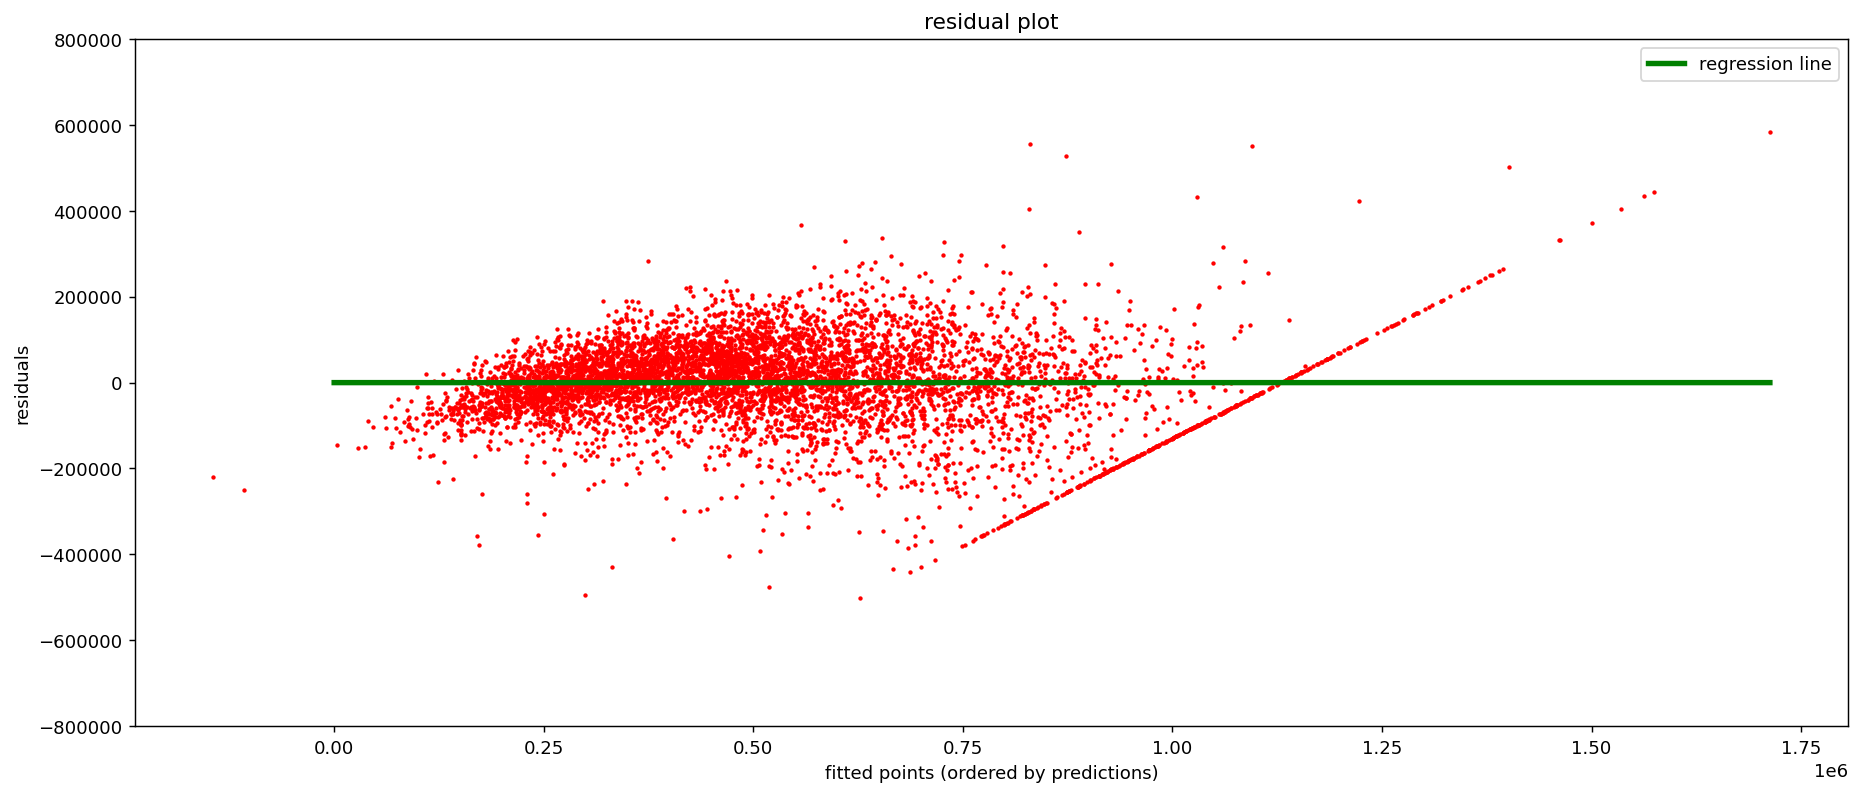

In [18]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# 2)Distribution of Errors

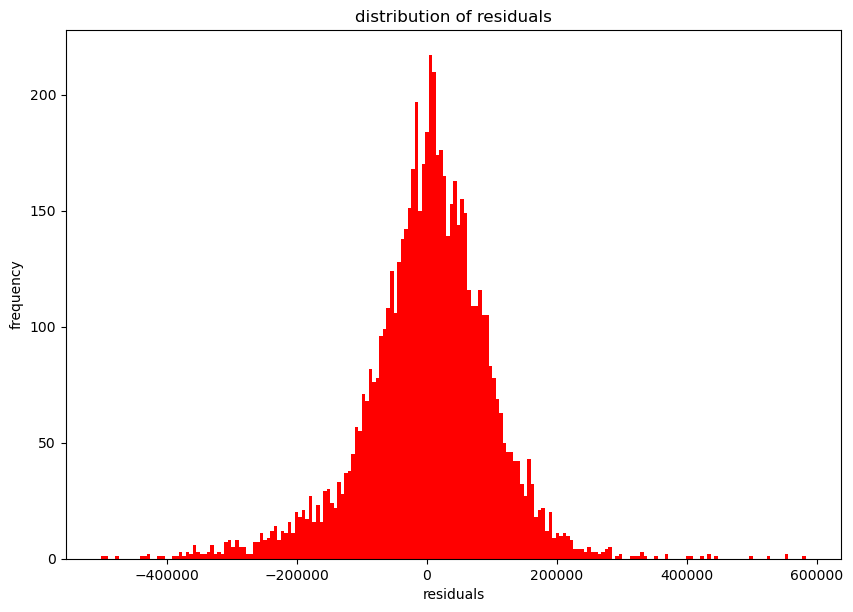

In [20]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

#  3) Model Coefficients

In [21]:
coefficients_table = pd.DataFrame({'column': a_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')
coefficient_table

,column,coefficients
12,Longitude,-23655.851656
9,Basement Area (in Sqft),-20492.532813
8,Area of the House from Basement (in Sqft),-10027.341774
15,Years since Renovation,-9639.256645
0,No of Bedrooms,-3762.216788
14,Lot Area after Renovation (in Sqft),-2758.536621
4,No of Floors,2078.315443
17,Waterfront View_Yes,10814.563503
1,No of Bathrooms,12054.068688
18,Zipcode_group_Zipcode_group_1,12226.527710


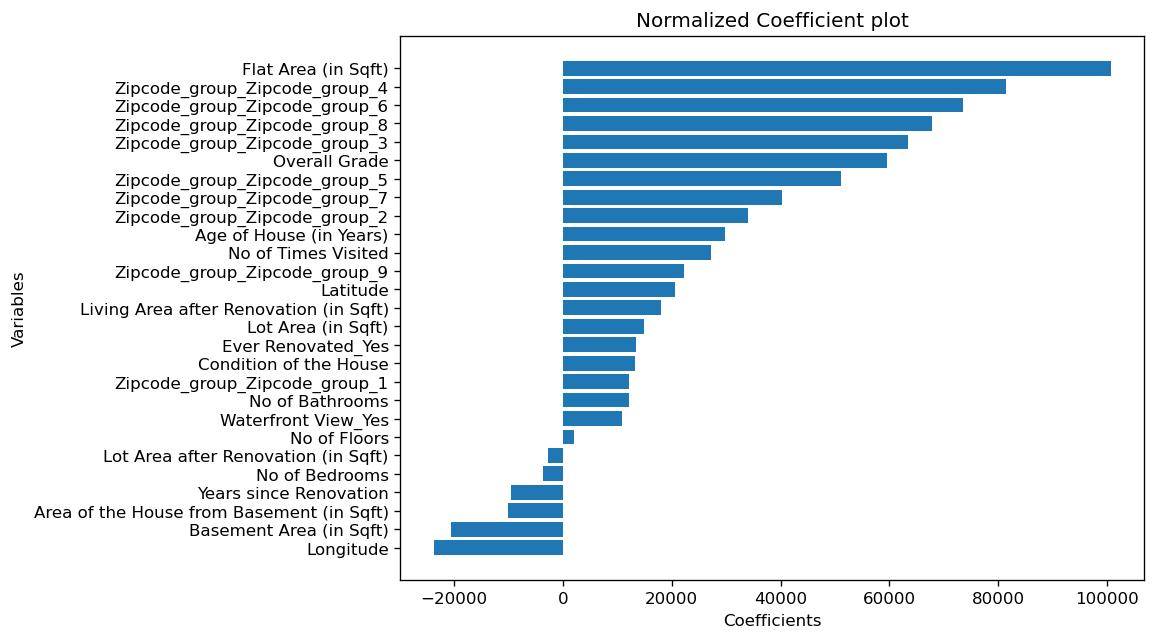

In [22]:
plt.figure(figsize=(8,6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

LinearRegression(normalize=True)